# Breast Cancer Prediction Using Machine Learning Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [116]:
dataset = pd.read_csv('data.csv')

In [47]:
dataset.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [48]:
dataset.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [49]:
dataset = dataset.dropna(how='any',axis=0) 

In [117]:
dataset.shape

(569, 32)

In [118]:
categorical={"diagnosis":{"M": 1, "B": 0}}

In [119]:
dataset.replace(categorical, inplace=True)
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [108]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [66]:
X

array([[8.4230200e+05, 1.7990000e+01, 1.0380000e+01, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 2.0570000e+01, 1.7770000e+01, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07, 1.9690000e+01, 2.1250000e+01, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05, 1.6600000e+01, 2.8080000e+01, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05, 2.0600000e+01, 2.9330000e+01, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04, 7.7600000e+00, 2.4540000e+01, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

In [67]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [68]:
X.shape

(569, 31)

In [69]:
y.shape

(569,)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [71]:
print(X_train)

[[9.11685000e+05 1.14900000e+01 1.45900000e+01 ... 7.43100000e-02
  2.94100000e-01 9.18000000e-02]
 [8.92657000e+05 1.04900000e+01 1.86100000e+01 ... 6.52800000e-02
  2.21300000e-01 7.84200000e-02]
 [8.71100300e+06 1.22500000e+01 1.79400000e+01 ... 8.21100000e-02
  3.11300000e-01 8.13200000e-02]
 ...
 [9.01034301e+08 9.43600000e+00 1.83200000e+01 ... 5.05200000e-02
  2.45400000e-01 8.13600000e-02]
 [8.75099000e+05 9.72000000e+00 1.82200000e+01 ... 0.00000000e+00
  1.90900000e-01 6.55900000e-02]
 [9.25291000e+05 1.15100000e+01 2.39300000e+01 ... 9.65300000e-02
  2.11200000e-01 8.73200000e-02]]


In [72]:
print(y_train)

[0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0
 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0
 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0]


In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression Model

In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[105   3]
 [  3  60]]


0.9649122807017544

## Logistic Regression Accuracy: 96%

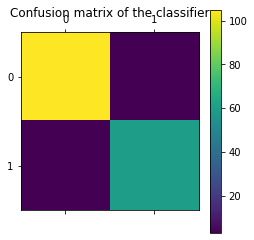

In [81]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(y_test, y_pred)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

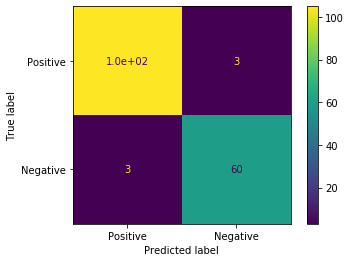

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Positive','Negative'])
cmd.plot()

## K-Nearest Neighbors (K-NN)

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [101]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [102]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[107   1]
 [  6  57]]


0.9590643274853801

## KNN Accuracy: 95%

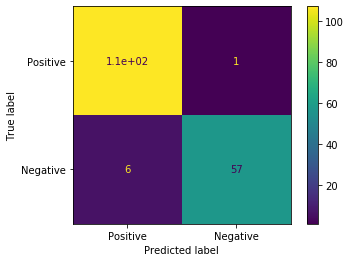

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Positive','Negative'])
cmd.plot()

## Support Vector Machine (SVM)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [112]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [113]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[100   8]
 [  3  60]]


0.935672514619883

## Support Vector Machine Accuracy: 93.5%

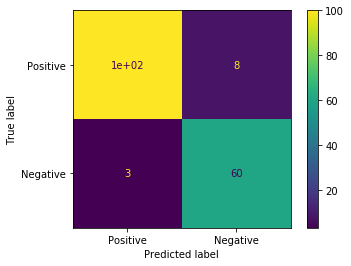

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Positive','Negative'])
cmd.plot()

## Kernel SVM

In [121]:
dataset = pd.read_csv('data.csv')
categorical={"diagnosis":{"M": 1, "B": 0}}
dataset.replace(categorical, inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [122]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [123]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [124]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[106   2]
 [  3  60]]


0.9707602339181286

## Kernel SVM accuracy: 97%

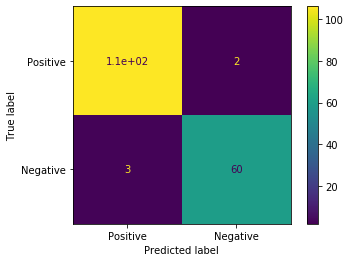

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Positive','Negative'])
cmd.plot()

# Naive Bayes

In [127]:
dataset = pd.read_csv('data.csv')
categorical={"diagnosis":{"M": 1, "B": 0}}
dataset.replace(categorical, inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [128]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [129]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]

In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[107   1]
 [ 61   2]]


0.6374269005847953

## Naive Bayes Accuracy: 63%

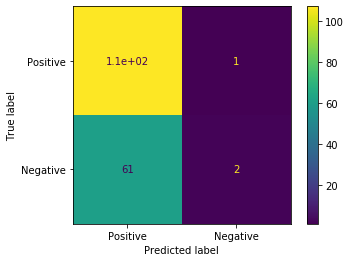

In [131]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Positive','Negative'])
cmd.plot()

# Decision Tree Classification

In [132]:
dataset = pd.read_csv('data.csv')
categorical={"diagnosis":{"M": 1, "B": 0}}
dataset.replace(categorical, inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [133]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [135]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

In [136]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[105   3]
 [  3  60]]


0.9649122807017544

## Decision Tree Accuracy: 96%

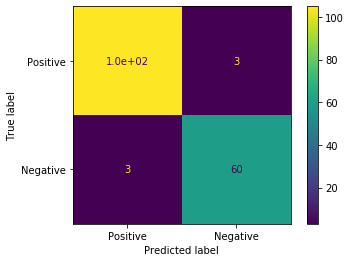

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Positive','Negative'])
cmd.plot()

# Random Forest

In [138]:
dataset = pd.read_csv('data.csv')
categorical={"diagnosis":{"M": 1, "B": 0}}
dataset.replace(categorical, inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [140]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [141]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[104   4]
 [  4  59]]


0.9532163742690059

## Random Forest Accuracy: 95%

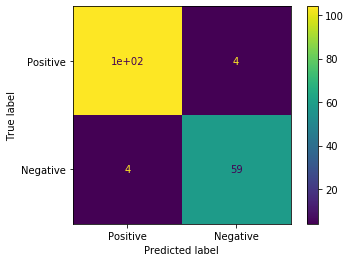

In [143]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Positive','Negative'])
cmd.plot()

# Classification Algorithm Accuracy

## Logistic Regression       : 96%

## K-Nearest Neighbors      : 95%

## Support Vector Machine : 93.5%

## Kernel SVM                      : 97%

## Naive Bayes                     : 63%

## Decision Tree                   : 96%

## Random Forest                : 95%

# Deep Learning - Artificial  Neural Network

In [144]:
import tensorflow as tf

In [145]:
tf.__version__

'2.3.1'

In [146]:
dataset = pd.read_csv('data.csv')
categorical={"diagnosis":{"M": 1, "B": 0}}
dataset.replace(categorical, inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [147]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [149]:
ann = tf.keras.models.Sequential()

In [150]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [151]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [152]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [153]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [156]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
15/15 [==============================] - 0s 931us/step - loss: 0.0438 - accuracy: 0.9868
Epoch 2/100
15/15 [==============================] - 0s 933us/step - loss: 0.0433 - accuracy: 0.9868
Epoch 3/100
15/15 [==============================] - 0s 864us/step - loss: 0.0434 - accuracy: 0.9868
Epoch 4/100
15/15 [==============================] - 0s 793us/step - loss: 0.0427 - accuracy: 0.9868
Epoch 5/100
15/15 [==============================] - 0s 787us/step - loss: 0.0422 - accuracy: 0.9868
Epoch 6/100
15/15 [==============================] - 0s 864us/step - loss: 0.0416 - accuracy: 0.9868
Epoch 7/100
15/15 [==============================] - 0s 997us/step - loss: 0.0414 - accuracy: 0.9868
Epoch 8/100
15/15 [==============================] - 0s 864us/step - loss: 0.0408 - accuracy: 0.9890
Epoch 9/100
15/15 [==============================] - 0s 890us/step - loss: 0.0405 - accuracy: 0.9890
Epoch 10/100
15/15 [==============================] - 0s 903us/step - loss: 0.0401 - accura

15/15 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 0.9934
Epoch 82/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9934
Epoch 83/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9934
Epoch 84/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9934
Epoch 85/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9956
Epoch 86/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.9956
Epoch 87/100
15/15 [==============================] - 0s 997us/step - loss: 0.0185 - accuracy: 0.9956
Epoch 88/100
15/15 [==============================] - 0s 997us/step - loss: 0.0184 - accuracy: 0.9956
Epoch 89/100
15/15 [==============================] - 0s 931us/step - loss: 0.0180 - accuracy: 0.9956
Epoch 90/100
15/15 [==============================] - 0s 997us/step - loss: 0.0181 - accuracy: 0.9956
Epoch

In [157]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [159]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  3]
 [ 2 45]]


0.956140350877193

## Artificial Neural Network Accuracy: 95%

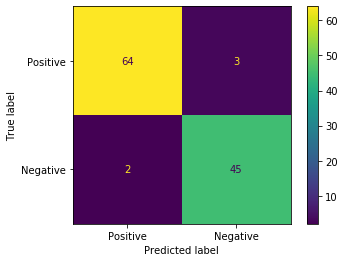

In [160]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Positive','Negative'])
cmd.plot()

# Model Selection and boosting

## K-fold cross validation

In [161]:
dataset = pd.read_csv('data.csv')
categorical={"diagnosis":{"M": 1, "B": 0}}
dataset.replace(categorical, inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [162]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [163]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [164]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

In [165]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[106   2]
 [  3  60]]


0.9707602339181286

In [166]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.00 %
Standard Deviation: 2.69 %


## CatBoosting

In [167]:
dataset = pd.read_csv('data.csv')
categorical={"diagnosis":{"M": 1, "B": 0}}
dataset.replace(categorical, inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [168]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.006952
0:	learn: 0.6825449	total: 190ms	remaining: 3m 10s
1:	learn: 0.6716326	total: 194ms	remaining: 1m 36s
2:	learn: 0.6620715	total: 199ms	remaining: 1m 6s
3:	learn: 0.6526014	total: 203ms	remaining: 50.5s
4:	learn: 0.6437266	total: 207ms	remaining: 41.3s
5:	learn: 0.6331582	total: 212ms	remaining: 35.1s
6:	learn: 0.6229364	total: 216ms	remaining: 30.7s
7:	learn: 0.6147480	total: 220ms	remaining: 27.3s
8:	learn: 0.6062293	total: 224ms	remaining: 24.7s
9:	learn: 0.5963186	total: 229ms	remaining: 22.6s
10:	learn: 0.5881416	total: 233ms	remaining: 20.9s
11:	learn: 0.5801108	total: 237ms	remaining: 19.5s
12:	learn: 0.5717964	total: 240ms	remaining: 18.3s
13:	learn: 0.5624579	total: 244ms	remaining: 17.2s
14:	learn: 0.5528906	total: 248ms	remaining: 16.3s
15:	learn: 0.5459575	total: 253ms	remaining: 15.5s
16:	learn: 0.5370112	total: 257ms	remaining: 14.8s
17:	learn: 0.5303134	total: 261ms	remaining: 14.2s
18:	learn: 0.5222235	total: 265ms	remaining: 13.7s
19:	learn

165:	learn: 0.1172721	total: 874ms	remaining: 4.39s
166:	learn: 0.1164074	total: 878ms	remaining: 4.38s
167:	learn: 0.1156045	total: 883ms	remaining: 4.37s
168:	learn: 0.1146897	total: 888ms	remaining: 4.36s
169:	learn: 0.1140457	total: 892ms	remaining: 4.36s
170:	learn: 0.1133120	total: 897ms	remaining: 4.35s
171:	learn: 0.1125567	total: 901ms	remaining: 4.34s
172:	learn: 0.1120282	total: 905ms	remaining: 4.33s
173:	learn: 0.1113462	total: 910ms	remaining: 4.32s
174:	learn: 0.1105929	total: 914ms	remaining: 4.31s
175:	learn: 0.1098377	total: 918ms	remaining: 4.3s
176:	learn: 0.1091621	total: 923ms	remaining: 4.29s
177:	learn: 0.1087133	total: 927ms	remaining: 4.28s
178:	learn: 0.1080621	total: 932ms	remaining: 4.28s
179:	learn: 0.1074223	total: 937ms	remaining: 4.27s
180:	learn: 0.1067783	total: 941ms	remaining: 4.26s
181:	learn: 0.1062300	total: 946ms	remaining: 4.25s
182:	learn: 0.1055355	total: 950ms	remaining: 4.24s
183:	learn: 0.1048945	total: 954ms	remaining: 4.23s
184:	learn: 0

354:	learn: 0.0467662	total: 1.73s	remaining: 3.14s
355:	learn: 0.0465884	total: 1.73s	remaining: 3.13s
356:	learn: 0.0463828	total: 1.74s	remaining: 3.13s
357:	learn: 0.0461982	total: 1.74s	remaining: 3.12s
358:	learn: 0.0459636	total: 1.75s	remaining: 3.12s
359:	learn: 0.0457925	total: 1.75s	remaining: 3.11s
360:	learn: 0.0456219	total: 1.75s	remaining: 3.11s
361:	learn: 0.0454526	total: 1.76s	remaining: 3.1s
362:	learn: 0.0452344	total: 1.76s	remaining: 3.1s
363:	learn: 0.0451284	total: 1.77s	remaining: 3.09s
364:	learn: 0.0450036	total: 1.77s	remaining: 3.08s
365:	learn: 0.0448319	total: 1.78s	remaining: 3.08s
366:	learn: 0.0446626	total: 1.78s	remaining: 3.07s
367:	learn: 0.0445254	total: 1.78s	remaining: 3.06s
368:	learn: 0.0443835	total: 1.79s	remaining: 3.06s
369:	learn: 0.0441846	total: 1.79s	remaining: 3.05s
370:	learn: 0.0440341	total: 1.8s	remaining: 3.05s
371:	learn: 0.0438449	total: 1.8s	remaining: 3.04s
372:	learn: 0.0437035	total: 1.8s	remaining: 3.03s
373:	learn: 0.043

528:	learn: 0.0273281	total: 2.42s	remaining: 2.15s
529:	learn: 0.0272451	total: 2.42s	remaining: 2.15s
530:	learn: 0.0271468	total: 2.42s	remaining: 2.14s
531:	learn: 0.0270884	total: 2.43s	remaining: 2.14s
532:	learn: 0.0270271	total: 2.43s	remaining: 2.13s
533:	learn: 0.0269461	total: 2.44s	remaining: 2.13s
534:	learn: 0.0268843	total: 2.44s	remaining: 2.12s
535:	learn: 0.0267965	total: 2.44s	remaining: 2.12s
536:	learn: 0.0267241	total: 2.45s	remaining: 2.11s
537:	learn: 0.0266359	total: 2.45s	remaining: 2.1s
538:	learn: 0.0265370	total: 2.46s	remaining: 2.1s
539:	learn: 0.0264320	total: 2.46s	remaining: 2.1s
540:	learn: 0.0263613	total: 2.46s	remaining: 2.09s
541:	learn: 0.0263172	total: 2.47s	remaining: 2.09s
542:	learn: 0.0262404	total: 2.47s	remaining: 2.08s
543:	learn: 0.0261593	total: 2.48s	remaining: 2.08s
544:	learn: 0.0260827	total: 2.48s	remaining: 2.07s
545:	learn: 0.0260075	total: 2.49s	remaining: 2.07s
546:	learn: 0.0259431	total: 2.49s	remaining: 2.06s
547:	learn: 0.0

720:	learn: 0.0173592	total: 3.28s	remaining: 1.27s
721:	learn: 0.0173052	total: 3.28s	remaining: 1.26s
722:	learn: 0.0172741	total: 3.29s	remaining: 1.26s
723:	learn: 0.0172497	total: 3.29s	remaining: 1.25s
724:	learn: 0.0172164	total: 3.29s	remaining: 1.25s
725:	learn: 0.0171937	total: 3.3s	remaining: 1.25s
726:	learn: 0.0171740	total: 3.3s	remaining: 1.24s
727:	learn: 0.0171567	total: 3.31s	remaining: 1.24s
728:	learn: 0.0171308	total: 3.31s	remaining: 1.23s
729:	learn: 0.0170755	total: 3.32s	remaining: 1.23s
730:	learn: 0.0170384	total: 3.32s	remaining: 1.22s
731:	learn: 0.0170016	total: 3.32s	remaining: 1.22s
732:	learn: 0.0169562	total: 3.33s	remaining: 1.21s
733:	learn: 0.0169147	total: 3.33s	remaining: 1.21s
734:	learn: 0.0168820	total: 3.34s	remaining: 1.2s
735:	learn: 0.0168546	total: 3.34s	remaining: 1.2s
736:	learn: 0.0168118	total: 3.34s	remaining: 1.19s
737:	learn: 0.0167723	total: 3.35s	remaining: 1.19s
738:	learn: 0.0167363	total: 3.35s	remaining: 1.18s
739:	learn: 0.01

899:	learn: 0.0122667	total: 4.14s	remaining: 460ms
900:	learn: 0.0122433	total: 4.14s	remaining: 455ms
901:	learn: 0.0122191	total: 4.15s	remaining: 451ms
902:	learn: 0.0122030	total: 4.15s	remaining: 446ms
903:	learn: 0.0121713	total: 4.16s	remaining: 441ms
904:	learn: 0.0121486	total: 4.16s	remaining: 437ms
905:	learn: 0.0121286	total: 4.17s	remaining: 432ms
906:	learn: 0.0121140	total: 4.17s	remaining: 428ms
907:	learn: 0.0120908	total: 4.18s	remaining: 423ms
908:	learn: 0.0120601	total: 4.18s	remaining: 419ms
909:	learn: 0.0120334	total: 4.19s	remaining: 414ms
910:	learn: 0.0120138	total: 4.2s	remaining: 410ms
911:	learn: 0.0119867	total: 4.2s	remaining: 405ms
912:	learn: 0.0119508	total: 4.21s	remaining: 401ms
913:	learn: 0.0119266	total: 4.21s	remaining: 396ms
914:	learn: 0.0119060	total: 4.22s	remaining: 392ms
915:	learn: 0.0118796	total: 4.22s	remaining: 387ms
916:	learn: 0.0118646	total: 4.23s	remaining: 383ms
917:	learn: 0.0118395	total: 4.23s	remaining: 378ms
918:	learn: 0.

In [169]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[105   3]
 [  2  61]]


0.9707602339181286

## CatBoosting Accuracy: 97%

## Applying k-Fold Cross Validation

In [170]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Learning rate set to 0.006644
0:	learn: 0.6825194	total: 11.1ms	remaining: 11.1s
1:	learn: 0.6732115	total: 17.3ms	remaining: 8.65s
2:	learn: 0.6644569	total: 22.1ms	remaining: 7.35s
3:	learn: 0.6553044	total: 26.5ms	remaining: 6.6s
4:	learn: 0.6456045	total: 30.4ms	remaining: 6.04s
5:	learn: 0.6359731	total: 34.1ms	remaining: 5.64s
6:	learn: 0.6266262	total: 37.8ms	remaining: 5.36s
7:	learn: 0.6185266	total: 41.7ms	remaining: 5.17s
8:	learn: 0.6095155	total: 45.7ms	remaining: 5.03s
9:	learn: 0.6005662	total: 49.5ms	remaining: 4.9s
10:	learn: 0.5934347	total: 53.3ms	remaining: 4.79s
11:	learn: 0.5849696	total: 57.5ms	remaining: 4.74s
12:	learn: 0.5780792	total: 61.4ms	remaining: 4.66s
13:	learn: 0.5698043	total: 65.1ms	remaining: 4.58s
14:	learn: 0.5613887	total: 68.9ms	remaining: 4.52s
15:	learn: 0.5543468	total: 72.7ms	remaining: 4.47s
16:	learn: 0.5461446	total: 76.5ms	remaining: 4.42s
17:	learn: 0.5390561	total: 80.1ms	remaining: 4.37s
18:	learn: 0.5321547	total: 83.9ms	remaining: 

167:	learn: 0.1232696	total: 681ms	remaining: 3.38s
168:	learn: 0.1222809	total: 686ms	remaining: 3.37s
169:	learn: 0.1213402	total: 691ms	remaining: 3.37s
170:	learn: 0.1206297	total: 696ms	remaining: 3.38s
171:	learn: 0.1199383	total: 701ms	remaining: 3.37s
172:	learn: 0.1192027	total: 707ms	remaining: 3.38s
173:	learn: 0.1185362	total: 712ms	remaining: 3.38s
174:	learn: 0.1176974	total: 718ms	remaining: 3.38s
175:	learn: 0.1171358	total: 723ms	remaining: 3.38s
176:	learn: 0.1164484	total: 729ms	remaining: 3.39s
177:	learn: 0.1157470	total: 734ms	remaining: 3.39s
178:	learn: 0.1152213	total: 740ms	remaining: 3.39s
179:	learn: 0.1145134	total: 748ms	remaining: 3.41s
180:	learn: 0.1137683	total: 756ms	remaining: 3.42s
181:	learn: 0.1132147	total: 763ms	remaining: 3.43s
182:	learn: 0.1124910	total: 770ms	remaining: 3.44s
183:	learn: 0.1118522	total: 776ms	remaining: 3.44s
184:	learn: 0.1112398	total: 783ms	remaining: 3.45s
185:	learn: 0.1107029	total: 790ms	remaining: 3.46s
186:	learn: 

341:	learn: 0.0530261	total: 1.49s	remaining: 2.87s
342:	learn: 0.0527895	total: 1.5s	remaining: 2.87s
343:	learn: 0.0526139	total: 1.5s	remaining: 2.87s
344:	learn: 0.0524629	total: 1.51s	remaining: 2.86s
345:	learn: 0.0522520	total: 1.51s	remaining: 2.86s
346:	learn: 0.0520229	total: 1.52s	remaining: 2.85s
347:	learn: 0.0518297	total: 1.52s	remaining: 2.85s
348:	learn: 0.0515717	total: 1.52s	remaining: 2.85s
349:	learn: 0.0514462	total: 1.53s	remaining: 2.84s
350:	learn: 0.0512860	total: 1.53s	remaining: 2.84s
351:	learn: 0.0510790	total: 1.54s	remaining: 2.83s
352:	learn: 0.0509151	total: 1.54s	remaining: 2.83s
353:	learn: 0.0507616	total: 1.55s	remaining: 2.82s
354:	learn: 0.0505906	total: 1.55s	remaining: 2.82s
355:	learn: 0.0504332	total: 1.55s	remaining: 2.81s
356:	learn: 0.0501880	total: 1.56s	remaining: 2.81s
357:	learn: 0.0499953	total: 1.56s	remaining: 2.8s
358:	learn: 0.0498151	total: 1.57s	remaining: 2.8s
359:	learn: 0.0496152	total: 1.57s	remaining: 2.79s
360:	learn: 0.04

501:	learn: 0.0322833	total: 2.19s	remaining: 2.17s
502:	learn: 0.0321676	total: 2.19s	remaining: 2.16s
503:	learn: 0.0320582	total: 2.19s	remaining: 2.16s
504:	learn: 0.0319579	total: 2.2s	remaining: 2.16s
505:	learn: 0.0318471	total: 2.2s	remaining: 2.15s
506:	learn: 0.0317731	total: 2.21s	remaining: 2.15s
507:	learn: 0.0316523	total: 2.21s	remaining: 2.14s
508:	learn: 0.0315881	total: 2.22s	remaining: 2.14s
509:	learn: 0.0314852	total: 2.22s	remaining: 2.13s
510:	learn: 0.0314152	total: 2.23s	remaining: 2.13s
511:	learn: 0.0313410	total: 2.23s	remaining: 2.13s
512:	learn: 0.0312377	total: 2.23s	remaining: 2.12s
513:	learn: 0.0311294	total: 2.24s	remaining: 2.12s
514:	learn: 0.0310514	total: 2.24s	remaining: 2.11s
515:	learn: 0.0309549	total: 2.25s	remaining: 2.11s
516:	learn: 0.0308740	total: 2.25s	remaining: 2.1s
517:	learn: 0.0308221	total: 2.26s	remaining: 2.1s
518:	learn: 0.0307520	total: 2.26s	remaining: 2.1s
519:	learn: 0.0306915	total: 2.26s	remaining: 2.09s
520:	learn: 0.030

699:	learn: 0.0199848	total: 3.05s	remaining: 1.31s
700:	learn: 0.0199354	total: 3.05s	remaining: 1.3s
701:	learn: 0.0199029	total: 3.06s	remaining: 1.3s
702:	learn: 0.0198638	total: 3.06s	remaining: 1.29s
703:	learn: 0.0198339	total: 3.07s	remaining: 1.29s
704:	learn: 0.0197860	total: 3.07s	remaining: 1.28s
705:	learn: 0.0197412	total: 3.08s	remaining: 1.28s
706:	learn: 0.0196977	total: 3.08s	remaining: 1.28s
707:	learn: 0.0196557	total: 3.09s	remaining: 1.27s
708:	learn: 0.0196136	total: 3.09s	remaining: 1.27s
709:	learn: 0.0195720	total: 3.1s	remaining: 1.26s
710:	learn: 0.0195295	total: 3.1s	remaining: 1.26s
711:	learn: 0.0194837	total: 3.1s	remaining: 1.26s
712:	learn: 0.0194423	total: 3.11s	remaining: 1.25s
713:	learn: 0.0194131	total: 3.12s	remaining: 1.25s
714:	learn: 0.0193902	total: 3.12s	remaining: 1.24s
715:	learn: 0.0193535	total: 3.13s	remaining: 1.24s
716:	learn: 0.0193205	total: 3.13s	remaining: 1.24s
717:	learn: 0.0192775	total: 3.13s	remaining: 1.23s
718:	learn: 0.019

860:	learn: 0.0145267	total: 3.9s	remaining: 630ms
861:	learn: 0.0145043	total: 3.91s	remaining: 626ms
862:	learn: 0.0144696	total: 3.92s	remaining: 622ms
863:	learn: 0.0144283	total: 3.92s	remaining: 617ms
864:	learn: 0.0143955	total: 3.92s	remaining: 613ms
865:	learn: 0.0143720	total: 3.93s	remaining: 608ms
866:	learn: 0.0143422	total: 3.94s	remaining: 604ms
867:	learn: 0.0143142	total: 3.94s	remaining: 599ms
868:	learn: 0.0142832	total: 3.95s	remaining: 595ms
869:	learn: 0.0142602	total: 3.95s	remaining: 590ms
870:	learn: 0.0142320	total: 3.96s	remaining: 586ms
871:	learn: 0.0142008	total: 3.96s	remaining: 582ms
872:	learn: 0.0141807	total: 3.97s	remaining: 577ms
873:	learn: 0.0141645	total: 3.97s	remaining: 573ms
874:	learn: 0.0141306	total: 3.98s	remaining: 569ms
875:	learn: 0.0141073	total: 3.98s	remaining: 564ms
876:	learn: 0.0140879	total: 3.99s	remaining: 560ms
877:	learn: 0.0140646	total: 4s	remaining: 555ms
878:	learn: 0.0140474	total: 4s	remaining: 551ms
879:	learn: 0.01402

32:	learn: 0.4393165	total: 163ms	remaining: 4.78s
33:	learn: 0.4348919	total: 168ms	remaining: 4.77s
34:	learn: 0.4291850	total: 173ms	remaining: 4.76s
35:	learn: 0.4237928	total: 177ms	remaining: 4.74s
36:	learn: 0.4185628	total: 181ms	remaining: 4.72s
37:	learn: 0.4128574	total: 185ms	remaining: 4.68s
38:	learn: 0.4073249	total: 189ms	remaining: 4.67s
39:	learn: 0.4024569	total: 194ms	remaining: 4.64s
40:	learn: 0.3977457	total: 198ms	remaining: 4.63s
41:	learn: 0.3918908	total: 203ms	remaining: 4.63s
42:	learn: 0.3886682	total: 209ms	remaining: 4.65s
43:	learn: 0.3836071	total: 213ms	remaining: 4.63s
44:	learn: 0.3786912	total: 217ms	remaining: 4.61s
45:	learn: 0.3743158	total: 223ms	remaining: 4.62s
46:	learn: 0.3703723	total: 228ms	remaining: 4.61s
47:	learn: 0.3658760	total: 232ms	remaining: 4.6s
48:	learn: 0.3619734	total: 237ms	remaining: 4.61s
49:	learn: 0.3570387	total: 243ms	remaining: 4.61s
50:	learn: 0.3532494	total: 247ms	remaining: 4.59s
51:	learn: 0.3488811	total: 252m

200:	learn: 0.1043359	total: 852ms	remaining: 3.39s
201:	learn: 0.1036544	total: 856ms	remaining: 3.38s
202:	learn: 0.1030520	total: 860ms	remaining: 3.38s
203:	learn: 0.1026556	total: 865ms	remaining: 3.37s
204:	learn: 0.1021174	total: 869ms	remaining: 3.37s
205:	learn: 0.1016599	total: 873ms	remaining: 3.36s
206:	learn: 0.1010769	total: 877ms	remaining: 3.36s
207:	learn: 0.1005406	total: 880ms	remaining: 3.35s
208:	learn: 0.1000553	total: 884ms	remaining: 3.35s
209:	learn: 0.0995015	total: 887ms	remaining: 3.34s
210:	learn: 0.0990192	total: 892ms	remaining: 3.34s
211:	learn: 0.0985346	total: 897ms	remaining: 3.33s
212:	learn: 0.0979751	total: 901ms	remaining: 3.33s
213:	learn: 0.0973049	total: 905ms	remaining: 3.32s
214:	learn: 0.0966141	total: 909ms	remaining: 3.32s
215:	learn: 0.0961236	total: 912ms	remaining: 3.31s
216:	learn: 0.0955231	total: 916ms	remaining: 3.3s
217:	learn: 0.0949739	total: 920ms	remaining: 3.3s
218:	learn: 0.0945134	total: 923ms	remaining: 3.29s
219:	learn: 0.

386:	learn: 0.0464078	total: 1.72s	remaining: 2.72s
387:	learn: 0.0462584	total: 1.72s	remaining: 2.72s
388:	learn: 0.0461106	total: 1.73s	remaining: 2.71s
389:	learn: 0.0459980	total: 1.73s	remaining: 2.71s
390:	learn: 0.0457804	total: 1.74s	remaining: 2.71s
391:	learn: 0.0456247	total: 1.74s	remaining: 2.7s
392:	learn: 0.0455111	total: 1.75s	remaining: 2.7s
393:	learn: 0.0453689	total: 1.75s	remaining: 2.69s
394:	learn: 0.0452013	total: 1.76s	remaining: 2.69s
395:	learn: 0.0450643	total: 1.76s	remaining: 2.69s
396:	learn: 0.0449345	total: 1.76s	remaining: 2.68s
397:	learn: 0.0447668	total: 1.77s	remaining: 2.68s
398:	learn: 0.0445812	total: 1.77s	remaining: 2.67s
399:	learn: 0.0444675	total: 1.78s	remaining: 2.67s
400:	learn: 0.0443308	total: 1.78s	remaining: 2.66s
401:	learn: 0.0441605	total: 1.78s	remaining: 2.66s
402:	learn: 0.0440496	total: 1.79s	remaining: 2.65s
403:	learn: 0.0439101	total: 1.79s	remaining: 2.65s
404:	learn: 0.0438202	total: 1.8s	remaining: 2.64s
405:	learn: 0.0

565:	learn: 0.0277738	total: 2.56s	remaining: 1.96s
566:	learn: 0.0277195	total: 2.56s	remaining: 1.96s
567:	learn: 0.0276413	total: 2.57s	remaining: 1.95s
568:	learn: 0.0276012	total: 2.57s	remaining: 1.95s
569:	learn: 0.0275589	total: 2.58s	remaining: 1.95s
570:	learn: 0.0274917	total: 2.58s	remaining: 1.94s
571:	learn: 0.0274161	total: 2.59s	remaining: 1.94s
572:	learn: 0.0273718	total: 2.59s	remaining: 1.93s
573:	learn: 0.0272985	total: 2.6s	remaining: 1.93s
574:	learn: 0.0272354	total: 2.6s	remaining: 1.92s
575:	learn: 0.0271605	total: 2.61s	remaining: 1.92s
576:	learn: 0.0270923	total: 2.61s	remaining: 1.91s
577:	learn: 0.0270262	total: 2.62s	remaining: 1.91s
578:	learn: 0.0269737	total: 2.62s	remaining: 1.91s
579:	learn: 0.0269095	total: 2.62s	remaining: 1.9s
580:	learn: 0.0268183	total: 2.63s	remaining: 1.9s
581:	learn: 0.0267595	total: 2.63s	remaining: 1.89s
582:	learn: 0.0267022	total: 2.64s	remaining: 1.89s
583:	learn: 0.0266324	total: 2.64s	remaining: 1.88s
584:	learn: 0.02

748:	learn: 0.0183935	total: 3.42s	remaining: 1.15s
749:	learn: 0.0183682	total: 3.42s	remaining: 1.14s
750:	learn: 0.0183208	total: 3.43s	remaining: 1.14s
751:	learn: 0.0182802	total: 3.43s	remaining: 1.13s
752:	learn: 0.0182476	total: 3.44s	remaining: 1.13s
753:	learn: 0.0182133	total: 3.44s	remaining: 1.12s
754:	learn: 0.0181807	total: 3.45s	remaining: 1.12s
755:	learn: 0.0181428	total: 3.45s	remaining: 1.11s
756:	learn: 0.0181084	total: 3.46s	remaining: 1.11s
757:	learn: 0.0180653	total: 3.46s	remaining: 1.11s
758:	learn: 0.0180298	total: 3.47s	remaining: 1.1s
759:	learn: 0.0179890	total: 3.47s	remaining: 1.1s
760:	learn: 0.0179475	total: 3.48s	remaining: 1.09s
761:	learn: 0.0179357	total: 3.48s	remaining: 1.09s
762:	learn: 0.0178861	total: 3.49s	remaining: 1.08s
763:	learn: 0.0178462	total: 3.49s	remaining: 1.08s
764:	learn: 0.0178148	total: 3.5s	remaining: 1.07s
765:	learn: 0.0177769	total: 3.5s	remaining: 1.07s
766:	learn: 0.0177364	total: 3.5s	remaining: 1.06s
767:	learn: 0.017

910:	learn: 0.0133524	total: 4.27s	remaining: 418ms
911:	learn: 0.0133254	total: 4.28s	remaining: 413ms
912:	learn: 0.0132895	total: 4.29s	remaining: 408ms
913:	learn: 0.0132702	total: 4.29s	remaining: 404ms
914:	learn: 0.0132489	total: 4.3s	remaining: 399ms
915:	learn: 0.0132200	total: 4.3s	remaining: 395ms
916:	learn: 0.0131891	total: 4.31s	remaining: 390ms
917:	learn: 0.0131639	total: 4.32s	remaining: 386ms
918:	learn: 0.0131375	total: 4.32s	remaining: 381ms
919:	learn: 0.0131269	total: 4.33s	remaining: 376ms
920:	learn: 0.0131076	total: 4.33s	remaining: 372ms
921:	learn: 0.0130828	total: 4.34s	remaining: 367ms
922:	learn: 0.0130555	total: 4.34s	remaining: 362ms
923:	learn: 0.0130329	total: 4.35s	remaining: 358ms
924:	learn: 0.0130110	total: 4.35s	remaining: 353ms
925:	learn: 0.0129898	total: 4.36s	remaining: 348ms
926:	learn: 0.0129666	total: 4.36s	remaining: 344ms
927:	learn: 0.0129466	total: 4.37s	remaining: 339ms
928:	learn: 0.0129253	total: 4.38s	remaining: 334ms
929:	learn: 0.

71:	learn: 0.2690999	total: 346ms	remaining: 4.46s
72:	learn: 0.2658777	total: 350ms	remaining: 4.45s
73:	learn: 0.2622487	total: 355ms	remaining: 4.44s
74:	learn: 0.2594131	total: 360ms	remaining: 4.44s
75:	learn: 0.2563522	total: 365ms	remaining: 4.44s
76:	learn: 0.2540243	total: 371ms	remaining: 4.44s
77:	learn: 0.2512393	total: 375ms	remaining: 4.44s
78:	learn: 0.2489471	total: 380ms	remaining: 4.43s
79:	learn: 0.2461317	total: 386ms	remaining: 4.44s
80:	learn: 0.2432545	total: 391ms	remaining: 4.43s
81:	learn: 0.2413468	total: 395ms	remaining: 4.42s
82:	learn: 0.2390206	total: 400ms	remaining: 4.42s
83:	learn: 0.2370177	total: 405ms	remaining: 4.41s
84:	learn: 0.2342216	total: 409ms	remaining: 4.41s
85:	learn: 0.2313384	total: 416ms	remaining: 4.42s
86:	learn: 0.2292313	total: 421ms	remaining: 4.42s
87:	learn: 0.2269538	total: 426ms	remaining: 4.42s
88:	learn: 0.2243891	total: 432ms	remaining: 4.42s
89:	learn: 0.2214675	total: 436ms	remaining: 4.41s
90:	learn: 0.2194202	total: 441

231:	learn: 0.0750374	total: 1.15s	remaining: 3.82s
232:	learn: 0.0744531	total: 1.16s	remaining: 3.82s
233:	learn: 0.0740355	total: 1.17s	remaining: 3.82s
234:	learn: 0.0735964	total: 1.17s	remaining: 3.82s
235:	learn: 0.0732862	total: 1.18s	remaining: 3.81s
236:	learn: 0.0728728	total: 1.18s	remaining: 3.81s
237:	learn: 0.0723185	total: 1.19s	remaining: 3.81s
238:	learn: 0.0719116	total: 1.19s	remaining: 3.8s
239:	learn: 0.0714440	total: 1.2s	remaining: 3.8s
240:	learn: 0.0710940	total: 1.2s	remaining: 3.79s
241:	learn: 0.0706602	total: 1.21s	remaining: 3.79s
242:	learn: 0.0703221	total: 1.21s	remaining: 3.78s
243:	learn: 0.0699745	total: 1.22s	remaining: 3.78s
244:	learn: 0.0695272	total: 1.22s	remaining: 3.77s
245:	learn: 0.0691330	total: 1.23s	remaining: 3.77s
246:	learn: 0.0687400	total: 1.24s	remaining: 3.77s
247:	learn: 0.0683502	total: 1.24s	remaining: 3.76s
248:	learn: 0.0678308	total: 1.24s	remaining: 3.75s
249:	learn: 0.0674801	total: 1.25s	remaining: 3.75s
250:	learn: 0.06

414:	learn: 0.0330698	total: 2.02s	remaining: 2.85s
415:	learn: 0.0329716	total: 2.03s	remaining: 2.85s
416:	learn: 0.0329154	total: 2.03s	remaining: 2.84s
417:	learn: 0.0327650	total: 2.04s	remaining: 2.83s
418:	learn: 0.0326709	total: 2.04s	remaining: 2.83s
419:	learn: 0.0325891	total: 2.04s	remaining: 2.82s
420:	learn: 0.0324581	total: 2.05s	remaining: 2.82s
421:	learn: 0.0323570	total: 2.05s	remaining: 2.81s
422:	learn: 0.0322106	total: 2.06s	remaining: 2.81s
423:	learn: 0.0320956	total: 2.06s	remaining: 2.81s
424:	learn: 0.0319846	total: 2.07s	remaining: 2.8s
425:	learn: 0.0318712	total: 2.07s	remaining: 2.79s
426:	learn: 0.0318088	total: 2.08s	remaining: 2.79s
427:	learn: 0.0316838	total: 2.08s	remaining: 2.78s
428:	learn: 0.0315734	total: 2.09s	remaining: 2.78s
429:	learn: 0.0314627	total: 2.09s	remaining: 2.77s
430:	learn: 0.0313824	total: 2.1s	remaining: 2.77s
431:	learn: 0.0312806	total: 2.1s	remaining: 2.76s
432:	learn: 0.0312447	total: 2.1s	remaining: 2.76s
433:	learn: 0.03

598:	learn: 0.0197237	total: 2.89s	remaining: 1.93s
599:	learn: 0.0196740	total: 2.89s	remaining: 1.93s
600:	learn: 0.0196314	total: 2.9s	remaining: 1.92s
601:	learn: 0.0196121	total: 2.9s	remaining: 1.92s
602:	learn: 0.0195587	total: 2.91s	remaining: 1.91s
603:	learn: 0.0195153	total: 2.91s	remaining: 1.91s
604:	learn: 0.0194620	total: 2.92s	remaining: 1.9s
605:	learn: 0.0194510	total: 2.92s	remaining: 1.9s
606:	learn: 0.0193950	total: 2.92s	remaining: 1.89s
607:	learn: 0.0193601	total: 2.93s	remaining: 1.89s
608:	learn: 0.0193084	total: 2.94s	remaining: 1.88s
609:	learn: 0.0192659	total: 2.94s	remaining: 1.88s
610:	learn: 0.0192077	total: 2.94s	remaining: 1.87s
611:	learn: 0.0191689	total: 2.95s	remaining: 1.87s
612:	learn: 0.0191270	total: 2.95s	remaining: 1.86s
613:	learn: 0.0190894	total: 2.96s	remaining: 1.86s
614:	learn: 0.0190470	total: 2.96s	remaining: 1.85s
615:	learn: 0.0189839	total: 2.96s	remaining: 1.85s
616:	learn: 0.0189430	total: 2.97s	remaining: 1.84s
617:	learn: 0.01

763:	learn: 0.0139257	total: 3.68s	remaining: 1.14s
764:	learn: 0.0139051	total: 3.69s	remaining: 1.13s
765:	learn: 0.0138778	total: 3.69s	remaining: 1.13s
766:	learn: 0.0138440	total: 3.7s	remaining: 1.12s
767:	learn: 0.0138161	total: 3.7s	remaining: 1.12s
768:	learn: 0.0137959	total: 3.71s	remaining: 1.11s
769:	learn: 0.0137658	total: 3.71s	remaining: 1.11s
770:	learn: 0.0137397	total: 3.71s	remaining: 1.1s
771:	learn: 0.0137048	total: 3.72s	remaining: 1.1s
772:	learn: 0.0136696	total: 3.73s	remaining: 1.09s
773:	learn: 0.0136385	total: 3.73s	remaining: 1.09s
774:	learn: 0.0136080	total: 3.73s	remaining: 1.08s
775:	learn: 0.0135713	total: 3.74s	remaining: 1.08s
776:	learn: 0.0135393	total: 3.74s	remaining: 1.07s
777:	learn: 0.0135085	total: 3.75s	remaining: 1.07s
778:	learn: 0.0134831	total: 3.75s	remaining: 1.06s
779:	learn: 0.0134524	total: 3.76s	remaining: 1.06s
780:	learn: 0.0134337	total: 3.76s	remaining: 1.05s
781:	learn: 0.0134023	total: 3.77s	remaining: 1.05s
782:	learn: 0.01

956:	learn: 0.0097475	total: 5.07s	remaining: 228ms
957:	learn: 0.0097331	total: 5.07s	remaining: 222ms
958:	learn: 0.0097258	total: 5.08s	remaining: 217ms
959:	learn: 0.0097117	total: 5.08s	remaining: 212ms
960:	learn: 0.0096888	total: 5.09s	remaining: 206ms
961:	learn: 0.0096696	total: 5.09s	remaining: 201ms
962:	learn: 0.0096495	total: 5.09s	remaining: 196ms
963:	learn: 0.0096296	total: 5.1s	remaining: 190ms
964:	learn: 0.0096188	total: 5.1s	remaining: 185ms
965:	learn: 0.0096102	total: 5.11s	remaining: 180ms
966:	learn: 0.0095900	total: 5.11s	remaining: 174ms
967:	learn: 0.0095738	total: 5.12s	remaining: 169ms
968:	learn: 0.0095657	total: 5.12s	remaining: 164ms
969:	learn: 0.0095548	total: 5.12s	remaining: 158ms
970:	learn: 0.0095424	total: 5.13s	remaining: 153ms
971:	learn: 0.0095327	total: 5.13s	remaining: 148ms
972:	learn: 0.0095182	total: 5.13s	remaining: 142ms
973:	learn: 0.0094947	total: 5.14s	remaining: 137ms
974:	learn: 0.0094862	total: 5.14s	remaining: 132ms
975:	learn: 0.

132:	learn: 0.1463113	total: 518ms	remaining: 3.38s
133:	learn: 0.1450799	total: 523ms	remaining: 3.38s
134:	learn: 0.1438674	total: 527ms	remaining: 3.38s
135:	learn: 0.1428102	total: 532ms	remaining: 3.38s
136:	learn: 0.1416321	total: 536ms	remaining: 3.38s
137:	learn: 0.1407282	total: 540ms	remaining: 3.37s
138:	learn: 0.1397940	total: 544ms	remaining: 3.37s
139:	learn: 0.1386053	total: 548ms	remaining: 3.36s
140:	learn: 0.1375323	total: 551ms	remaining: 3.36s
141:	learn: 0.1366270	total: 556ms	remaining: 3.36s
142:	learn: 0.1354869	total: 560ms	remaining: 3.35s
143:	learn: 0.1342796	total: 563ms	remaining: 3.35s
144:	learn: 0.1331966	total: 567ms	remaining: 3.34s
145:	learn: 0.1321338	total: 571ms	remaining: 3.34s
146:	learn: 0.1309755	total: 574ms	remaining: 3.33s
147:	learn: 0.1299746	total: 578ms	remaining: 3.33s
148:	learn: 0.1290563	total: 582ms	remaining: 3.32s
149:	learn: 0.1279903	total: 586ms	remaining: 3.32s
150:	learn: 0.1270180	total: 589ms	remaining: 3.31s
151:	learn: 

302:	learn: 0.0544890	total: 1.18s	remaining: 2.71s
303:	learn: 0.0542051	total: 1.18s	remaining: 2.71s
304:	learn: 0.0539326	total: 1.19s	remaining: 2.7s
305:	learn: 0.0536241	total: 1.19s	remaining: 2.7s
306:	learn: 0.0533478	total: 1.19s	remaining: 2.7s
307:	learn: 0.0530798	total: 1.2s	remaining: 2.69s
308:	learn: 0.0527901	total: 1.2s	remaining: 2.69s
309:	learn: 0.0526040	total: 1.21s	remaining: 2.69s
310:	learn: 0.0523780	total: 1.21s	remaining: 2.68s
311:	learn: 0.0521518	total: 1.21s	remaining: 2.68s
312:	learn: 0.0519039	total: 1.22s	remaining: 2.67s
313:	learn: 0.0516423	total: 1.22s	remaining: 2.67s
314:	learn: 0.0514148	total: 1.23s	remaining: 2.66s
315:	learn: 0.0511761	total: 1.23s	remaining: 2.66s
316:	learn: 0.0509437	total: 1.23s	remaining: 2.65s
317:	learn: 0.0507319	total: 1.24s	remaining: 2.65s
318:	learn: 0.0505493	total: 1.24s	remaining: 2.65s
319:	learn: 0.0502870	total: 1.24s	remaining: 2.64s
320:	learn: 0.0500941	total: 1.25s	remaining: 2.64s
321:	learn: 0.049

462:	learn: 0.0302899	total: 1.84s	remaining: 2.14s
463:	learn: 0.0302156	total: 1.85s	remaining: 2.14s
464:	learn: 0.0301390	total: 1.85s	remaining: 2.13s
465:	learn: 0.0300150	total: 1.86s	remaining: 2.13s
466:	learn: 0.0299170	total: 1.86s	remaining: 2.13s
467:	learn: 0.0298089	total: 1.87s	remaining: 2.12s
468:	learn: 0.0297428	total: 1.87s	remaining: 2.12s
469:	learn: 0.0296640	total: 1.88s	remaining: 2.11s
470:	learn: 0.0295914	total: 1.88s	remaining: 2.11s
471:	learn: 0.0294943	total: 1.88s	remaining: 2.11s
472:	learn: 0.0294053	total: 1.89s	remaining: 2.1s
473:	learn: 0.0292760	total: 1.89s	remaining: 2.1s
474:	learn: 0.0292108	total: 1.89s	remaining: 2.09s
475:	learn: 0.0291098	total: 1.9s	remaining: 2.09s
476:	learn: 0.0290106	total: 1.9s	remaining: 2.08s
477:	learn: 0.0289432	total: 1.91s	remaining: 2.08s
478:	learn: 0.0288565	total: 1.91s	remaining: 2.08s
479:	learn: 0.0287392	total: 1.91s	remaining: 2.07s
480:	learn: 0.0286691	total: 1.92s	remaining: 2.07s
481:	learn: 0.02

635:	learn: 0.0193754	total: 2.71s	remaining: 1.55s
636:	learn: 0.0193297	total: 2.72s	remaining: 1.55s
637:	learn: 0.0192798	total: 2.73s	remaining: 1.55s
638:	learn: 0.0192165	total: 2.74s	remaining: 1.55s
639:	learn: 0.0191558	total: 2.75s	remaining: 1.55s
640:	learn: 0.0191222	total: 2.76s	remaining: 1.54s
641:	learn: 0.0190869	total: 2.76s	remaining: 1.54s
642:	learn: 0.0190525	total: 2.77s	remaining: 1.54s
643:	learn: 0.0190115	total: 2.78s	remaining: 1.54s
644:	learn: 0.0189597	total: 2.79s	remaining: 1.53s
645:	learn: 0.0189138	total: 2.79s	remaining: 1.53s
646:	learn: 0.0188739	total: 2.8s	remaining: 1.53s
647:	learn: 0.0188536	total: 2.81s	remaining: 1.53s
648:	learn: 0.0188162	total: 2.82s	remaining: 1.52s
649:	learn: 0.0187741	total: 2.82s	remaining: 1.52s
650:	learn: 0.0187316	total: 2.83s	remaining: 1.52s
651:	learn: 0.0186856	total: 2.84s	remaining: 1.51s
652:	learn: 0.0186427	total: 2.85s	remaining: 1.51s
653:	learn: 0.0186066	total: 2.85s	remaining: 1.51s
654:	learn: 0

802:	learn: 0.0135115	total: 4.11s	remaining: 1.01s
803:	learn: 0.0134829	total: 4.11s	remaining: 1s
804:	learn: 0.0134605	total: 4.12s	remaining: 998ms
805:	learn: 0.0134359	total: 4.13s	remaining: 994ms
806:	learn: 0.0134062	total: 4.14s	remaining: 990ms
807:	learn: 0.0133800	total: 4.15s	remaining: 986ms
808:	learn: 0.0133402	total: 4.16s	remaining: 982ms
809:	learn: 0.0133138	total: 4.17s	remaining: 977ms
810:	learn: 0.0132926	total: 4.17s	remaining: 973ms
811:	learn: 0.0132657	total: 4.18s	remaining: 968ms
812:	learn: 0.0132499	total: 4.19s	remaining: 964ms
813:	learn: 0.0132271	total: 4.2s	remaining: 959ms
814:	learn: 0.0132015	total: 4.2s	remaining: 954ms
815:	learn: 0.0131818	total: 4.21s	remaining: 950ms
816:	learn: 0.0131529	total: 4.22s	remaining: 945ms
817:	learn: 0.0131302	total: 4.23s	remaining: 941ms
818:	learn: 0.0131053	total: 4.24s	remaining: 936ms
819:	learn: 0.0130773	total: 4.25s	remaining: 932ms
820:	learn: 0.0130500	total: 4.26s	remaining: 928ms
821:	learn: 0.013

978:	learn: 0.0098966	total: 4.96s	remaining: 106ms
979:	learn: 0.0098882	total: 4.97s	remaining: 101ms
980:	learn: 0.0098698	total: 4.97s	remaining: 96.3ms
981:	learn: 0.0098481	total: 4.97s	remaining: 91.2ms
982:	learn: 0.0098238	total: 4.98s	remaining: 86.1ms
983:	learn: 0.0097969	total: 4.98s	remaining: 81.1ms
984:	learn: 0.0097825	total: 4.99s	remaining: 76ms
985:	learn: 0.0097654	total: 4.99s	remaining: 70.9ms
986:	learn: 0.0097517	total: 5s	remaining: 65.8ms
987:	learn: 0.0097375	total: 5s	remaining: 60.7ms
988:	learn: 0.0097289	total: 5s	remaining: 55.7ms
989:	learn: 0.0097151	total: 5.01s	remaining: 50.6ms
990:	learn: 0.0096942	total: 5.01s	remaining: 45.5ms
991:	learn: 0.0096819	total: 5.02s	remaining: 40.5ms
992:	learn: 0.0096628	total: 5.02s	remaining: 35.4ms
993:	learn: 0.0096581	total: 5.02s	remaining: 30.3ms
994:	learn: 0.0096317	total: 5.03s	remaining: 25.3ms
995:	learn: 0.0096185	total: 5.03s	remaining: 20.2ms
996:	learn: 0.0096044	total: 5.03s	remaining: 15.2ms
997:	l

167:	learn: 0.1218322	total: 676ms	remaining: 3.35s
168:	learn: 0.1207869	total: 681ms	remaining: 3.35s
169:	learn: 0.1199823	total: 686ms	remaining: 3.35s
170:	learn: 0.1192384	total: 692ms	remaining: 3.35s
171:	learn: 0.1185505	total: 697ms	remaining: 3.36s
172:	learn: 0.1178684	total: 702ms	remaining: 3.35s
173:	learn: 0.1168780	total: 706ms	remaining: 3.35s
174:	learn: 0.1160159	total: 711ms	remaining: 3.35s
175:	learn: 0.1154350	total: 715ms	remaining: 3.35s
176:	learn: 0.1146262	total: 720ms	remaining: 3.35s
177:	learn: 0.1140483	total: 725ms	remaining: 3.35s
178:	learn: 0.1133899	total: 729ms	remaining: 3.34s
179:	learn: 0.1126553	total: 733ms	remaining: 3.34s
180:	learn: 0.1119495	total: 737ms	remaining: 3.34s
181:	learn: 0.1113259	total: 741ms	remaining: 3.33s
182:	learn: 0.1106160	total: 745ms	remaining: 3.33s
183:	learn: 0.1099275	total: 749ms	remaining: 3.32s
184:	learn: 0.1093903	total: 753ms	remaining: 3.32s
185:	learn: 0.1087077	total: 757ms	remaining: 3.31s
186:	learn: 

340:	learn: 0.0512024	total: 1.36s	remaining: 2.63s
341:	learn: 0.0509626	total: 1.36s	remaining: 2.63s
342:	learn: 0.0507565	total: 1.37s	remaining: 2.62s
343:	learn: 0.0505794	total: 1.37s	remaining: 2.62s
344:	learn: 0.0503880	total: 1.38s	remaining: 2.61s
345:	learn: 0.0501783	total: 1.38s	remaining: 2.61s
346:	learn: 0.0499832	total: 1.39s	remaining: 2.61s
347:	learn: 0.0497803	total: 1.39s	remaining: 2.6s
348:	learn: 0.0495921	total: 1.39s	remaining: 2.6s
349:	learn: 0.0494089	total: 1.4s	remaining: 2.6s
350:	learn: 0.0491943	total: 1.4s	remaining: 2.59s
351:	learn: 0.0490223	total: 1.41s	remaining: 2.59s
352:	learn: 0.0488089	total: 1.41s	remaining: 2.59s
353:	learn: 0.0486368	total: 1.42s	remaining: 2.58s
354:	learn: 0.0484323	total: 1.42s	remaining: 2.58s
355:	learn: 0.0482768	total: 1.42s	remaining: 2.58s
356:	learn: 0.0480939	total: 1.43s	remaining: 2.57s
357:	learn: 0.0479422	total: 1.43s	remaining: 2.57s
358:	learn: 0.0477801	total: 1.44s	remaining: 2.56s
359:	learn: 0.047

510:	learn: 0.0292686	total: 2.05s	remaining: 1.96s
511:	learn: 0.0291804	total: 2.05s	remaining: 1.96s
512:	learn: 0.0291013	total: 2.06s	remaining: 1.95s
513:	learn: 0.0290161	total: 2.06s	remaining: 1.95s
514:	learn: 0.0289383	total: 2.07s	remaining: 1.95s
515:	learn: 0.0288692	total: 2.07s	remaining: 1.94s
516:	learn: 0.0287945	total: 2.08s	remaining: 1.94s
517:	learn: 0.0287316	total: 2.08s	remaining: 1.93s
518:	learn: 0.0286385	total: 2.08s	remaining: 1.93s
519:	learn: 0.0285711	total: 2.09s	remaining: 1.93s
520:	learn: 0.0285124	total: 2.09s	remaining: 1.92s
521:	learn: 0.0284465	total: 2.09s	remaining: 1.92s
522:	learn: 0.0283936	total: 2.1s	remaining: 1.91s
523:	learn: 0.0283008	total: 2.1s	remaining: 1.91s
524:	learn: 0.0281844	total: 2.11s	remaining: 1.91s
525:	learn: 0.0281331	total: 2.11s	remaining: 1.9s
526:	learn: 0.0280685	total: 2.12s	remaining: 1.9s
527:	learn: 0.0279949	total: 2.12s	remaining: 1.89s
528:	learn: 0.0279093	total: 2.12s	remaining: 1.89s
529:	learn: 0.02

672:	learn: 0.0197731	total: 2.74s	remaining: 1.33s
673:	learn: 0.0197197	total: 2.74s	remaining: 1.33s
674:	learn: 0.0196705	total: 2.75s	remaining: 1.32s
675:	learn: 0.0196386	total: 2.75s	remaining: 1.32s
676:	learn: 0.0195999	total: 2.76s	remaining: 1.32s
677:	learn: 0.0195585	total: 2.76s	remaining: 1.31s
678:	learn: 0.0195295	total: 2.77s	remaining: 1.31s
679:	learn: 0.0195020	total: 2.77s	remaining: 1.3s
680:	learn: 0.0194495	total: 2.78s	remaining: 1.3s
681:	learn: 0.0194135	total: 2.78s	remaining: 1.3s
682:	learn: 0.0193720	total: 2.79s	remaining: 1.29s
683:	learn: 0.0193292	total: 2.79s	remaining: 1.29s
684:	learn: 0.0192899	total: 2.8s	remaining: 1.29s
685:	learn: 0.0192473	total: 2.8s	remaining: 1.28s
686:	learn: 0.0192031	total: 2.81s	remaining: 1.28s
687:	learn: 0.0191641	total: 2.81s	remaining: 1.27s
688:	learn: 0.0191228	total: 2.81s	remaining: 1.27s
689:	learn: 0.0190814	total: 2.82s	remaining: 1.27s
690:	learn: 0.0190422	total: 2.82s	remaining: 1.26s
691:	learn: 0.018

832:	learn: 0.0142627	total: 3.94s	remaining: 791ms
833:	learn: 0.0142366	total: 3.96s	remaining: 788ms
834:	learn: 0.0142096	total: 3.97s	remaining: 785ms
835:	learn: 0.0141762	total: 3.99s	remaining: 784ms
836:	learn: 0.0141546	total: 4s	remaining: 780ms
837:	learn: 0.0141328	total: 4.01s	remaining: 775ms
838:	learn: 0.0141027	total: 4.02s	remaining: 771ms
839:	learn: 0.0140756	total: 4.02s	remaining: 766ms
840:	learn: 0.0140463	total: 4.03s	remaining: 761ms
841:	learn: 0.0140145	total: 4.03s	remaining: 757ms
842:	learn: 0.0139853	total: 4.04s	remaining: 752ms
843:	learn: 0.0139558	total: 4.04s	remaining: 747ms
844:	learn: 0.0139280	total: 4.05s	remaining: 742ms
845:	learn: 0.0139101	total: 4.05s	remaining: 738ms
846:	learn: 0.0138830	total: 4.06s	remaining: 733ms
847:	learn: 0.0138532	total: 4.06s	remaining: 728ms
848:	learn: 0.0138222	total: 4.07s	remaining: 723ms
849:	learn: 0.0137954	total: 4.07s	remaining: 718ms
850:	learn: 0.0137760	total: 4.08s	remaining: 714ms
851:	learn: 0.0

Learning rate set to 0.006644
0:	learn: 0.6830727	total: 8.6ms	remaining: 8.59s
1:	learn: 0.6728786	total: 12.3ms	remaining: 6.15s
2:	learn: 0.6636710	total: 16.2ms	remaining: 5.37s
3:	learn: 0.6555151	total: 19.8ms	remaining: 4.94s
4:	learn: 0.6467007	total: 23.6ms	remaining: 4.7s
5:	learn: 0.6369076	total: 27.4ms	remaining: 4.54s
6:	learn: 0.6269552	total: 31.4ms	remaining: 4.45s
7:	learn: 0.6204363	total: 35ms	remaining: 4.34s
8:	learn: 0.6111123	total: 38.9ms	remaining: 4.28s
9:	learn: 0.6020889	total: 42.7ms	remaining: 4.22s
10:	learn: 0.5935990	total: 46.8ms	remaining: 4.2s
11:	learn: 0.5855366	total: 50.6ms	remaining: 4.16s
12:	learn: 0.5774543	total: 54.4ms	remaining: 4.13s
13:	learn: 0.5683928	total: 58.3ms	remaining: 4.1s
14:	learn: 0.5602214	total: 62.1ms	remaining: 4.08s
15:	learn: 0.5532614	total: 66ms	remaining: 4.06s
16:	learn: 0.5449738	total: 69.8ms	remaining: 4.03s
17:	learn: 0.5369063	total: 76.4ms	remaining: 4.17s
18:	learn: 0.5300772	total: 80.1ms	remaining: 4.14s


171:	learn: 0.1183300	total: 676ms	remaining: 3.25s
172:	learn: 0.1173920	total: 680ms	remaining: 3.25s
173:	learn: 0.1166497	total: 684ms	remaining: 3.25s
174:	learn: 0.1159236	total: 688ms	remaining: 3.24s
175:	learn: 0.1152648	total: 692ms	remaining: 3.24s
176:	learn: 0.1144922	total: 696ms	remaining: 3.24s
177:	learn: 0.1140008	total: 701ms	remaining: 3.24s
178:	learn: 0.1133266	total: 706ms	remaining: 3.24s
179:	learn: 0.1124539	total: 709ms	remaining: 3.23s
180:	learn: 0.1118309	total: 713ms	remaining: 3.23s
181:	learn: 0.1112447	total: 717ms	remaining: 3.22s
182:	learn: 0.1105251	total: 721ms	remaining: 3.22s
183:	learn: 0.1099683	total: 725ms	remaining: 3.21s
184:	learn: 0.1091797	total: 729ms	remaining: 3.21s
185:	learn: 0.1086068	total: 732ms	remaining: 3.21s
186:	learn: 0.1081398	total: 736ms	remaining: 3.2s
187:	learn: 0.1074894	total: 740ms	remaining: 3.19s
188:	learn: 0.1069405	total: 744ms	remaining: 3.19s
189:	learn: 0.1063160	total: 748ms	remaining: 3.19s
190:	learn: 0

351:	learn: 0.0505219	total: 1.41s	remaining: 2.6s
352:	learn: 0.0503369	total: 1.42s	remaining: 2.6s
353:	learn: 0.0501840	total: 1.42s	remaining: 2.6s
354:	learn: 0.0500086	total: 1.43s	remaining: 2.59s
355:	learn: 0.0498388	total: 1.43s	remaining: 2.59s
356:	learn: 0.0497015	total: 1.44s	remaining: 2.59s
357:	learn: 0.0494999	total: 1.44s	remaining: 2.58s
358:	learn: 0.0493083	total: 1.45s	remaining: 2.58s
359:	learn: 0.0491218	total: 1.45s	remaining: 2.58s
360:	learn: 0.0489144	total: 1.46s	remaining: 2.58s
361:	learn: 0.0487734	total: 1.46s	remaining: 2.58s
362:	learn: 0.0486117	total: 1.47s	remaining: 2.57s
363:	learn: 0.0484501	total: 1.47s	remaining: 2.57s
364:	learn: 0.0482442	total: 1.47s	remaining: 2.56s
365:	learn: 0.0480793	total: 1.48s	remaining: 2.56s
366:	learn: 0.0478747	total: 1.48s	remaining: 2.56s
367:	learn: 0.0477171	total: 1.49s	remaining: 2.56s
368:	learn: 0.0475052	total: 1.49s	remaining: 2.55s
369:	learn: 0.0473165	total: 1.5s	remaining: 2.55s
370:	learn: 0.04

528:	learn: 0.0290121	total: 2.28s	remaining: 2.03s
529:	learn: 0.0288937	total: 2.29s	remaining: 2.03s
530:	learn: 0.0288053	total: 2.29s	remaining: 2.02s
531:	learn: 0.0287476	total: 2.3s	remaining: 2.02s
532:	learn: 0.0286517	total: 2.31s	remaining: 2.02s
533:	learn: 0.0285656	total: 2.31s	remaining: 2.02s
534:	learn: 0.0284849	total: 2.32s	remaining: 2.01s
535:	learn: 0.0283945	total: 2.32s	remaining: 2.01s
536:	learn: 0.0282974	total: 2.33s	remaining: 2.01s
537:	learn: 0.0282278	total: 2.34s	remaining: 2.01s
538:	learn: 0.0281488	total: 2.34s	remaining: 2s
539:	learn: 0.0280559	total: 2.35s	remaining: 2s
540:	learn: 0.0279511	total: 2.36s	remaining: 2s
541:	learn: 0.0278815	total: 2.37s	remaining: 2s
542:	learn: 0.0277944	total: 2.37s	remaining: 2s
543:	learn: 0.0277013	total: 2.38s	remaining: 1.99s
544:	learn: 0.0276401	total: 2.38s	remaining: 1.99s
545:	learn: 0.0275773	total: 2.39s	remaining: 1.99s
546:	learn: 0.0275086	total: 2.4s	remaining: 1.99s
547:	learn: 0.0274377	total: 

711:	learn: 0.0184994	total: 3.49s	remaining: 1.41s
712:	learn: 0.0184706	total: 3.5s	remaining: 1.41s
713:	learn: 0.0184279	total: 3.5s	remaining: 1.4s
714:	learn: 0.0183816	total: 3.51s	remaining: 1.4s
715:	learn: 0.0183377	total: 3.52s	remaining: 1.39s
716:	learn: 0.0182922	total: 3.52s	remaining: 1.39s
717:	learn: 0.0182308	total: 3.53s	remaining: 1.39s
718:	learn: 0.0182079	total: 3.53s	remaining: 1.38s
719:	learn: 0.0181647	total: 3.54s	remaining: 1.38s
720:	learn: 0.0181253	total: 3.54s	remaining: 1.37s
721:	learn: 0.0180686	total: 3.55s	remaining: 1.37s
722:	learn: 0.0180250	total: 3.56s	remaining: 1.36s
723:	learn: 0.0179998	total: 3.56s	remaining: 1.36s
724:	learn: 0.0179623	total: 3.57s	remaining: 1.35s
725:	learn: 0.0179379	total: 3.58s	remaining: 1.35s
726:	learn: 0.0179194	total: 3.58s	remaining: 1.34s
727:	learn: 0.0178878	total: 3.59s	remaining: 1.34s
728:	learn: 0.0178370	total: 3.6s	remaining: 1.34s
729:	learn: 0.0177985	total: 3.6s	remaining: 1.33s
730:	learn: 0.0177

881:	learn: 0.0131573	total: 4.54s	remaining: 607ms
882:	learn: 0.0131320	total: 4.54s	remaining: 602ms
883:	learn: 0.0131070	total: 4.55s	remaining: 597ms
884:	learn: 0.0130885	total: 4.55s	remaining: 592ms
885:	learn: 0.0130695	total: 4.56s	remaining: 587ms
886:	learn: 0.0130387	total: 4.56s	remaining: 581ms
887:	learn: 0.0130149	total: 4.57s	remaining: 576ms
888:	learn: 0.0129949	total: 4.58s	remaining: 571ms
889:	learn: 0.0129768	total: 4.58s	remaining: 566ms
890:	learn: 0.0129441	total: 4.59s	remaining: 561ms
891:	learn: 0.0129176	total: 4.59s	remaining: 556ms
892:	learn: 0.0128884	total: 4.6s	remaining: 551ms
893:	learn: 0.0128510	total: 4.61s	remaining: 546ms
894:	learn: 0.0128346	total: 4.61s	remaining: 541ms
895:	learn: 0.0128029	total: 4.62s	remaining: 536ms
896:	learn: 0.0127691	total: 4.62s	remaining: 531ms
897:	learn: 0.0127424	total: 4.63s	remaining: 526ms
898:	learn: 0.0127246	total: 4.63s	remaining: 521ms
899:	learn: 0.0127050	total: 4.64s	remaining: 516ms
900:	learn: 0

46:	learn: 0.3694924	total: 178ms	remaining: 3.61s
47:	learn: 0.3651854	total: 182ms	remaining: 3.61s
48:	learn: 0.3613279	total: 186ms	remaining: 3.62s
49:	learn: 0.3560421	total: 191ms	remaining: 3.62s
50:	learn: 0.3516438	total: 195ms	remaining: 3.62s
51:	learn: 0.3477785	total: 199ms	remaining: 3.64s
52:	learn: 0.3436683	total: 203ms	remaining: 3.63s
53:	learn: 0.3404386	total: 207ms	remaining: 3.62s
54:	learn: 0.3364689	total: 210ms	remaining: 3.61s
55:	learn: 0.3327150	total: 214ms	remaining: 3.61s
56:	learn: 0.3291991	total: 218ms	remaining: 3.6s
57:	learn: 0.3257033	total: 221ms	remaining: 3.6s
58:	learn: 0.3224594	total: 225ms	remaining: 3.59s
59:	learn: 0.3189662	total: 229ms	remaining: 3.58s
60:	learn: 0.3150830	total: 232ms	remaining: 3.58s
61:	learn: 0.3114104	total: 236ms	remaining: 3.57s
62:	learn: 0.3079792	total: 240ms	remaining: 3.56s
63:	learn: 0.3043549	total: 243ms	remaining: 3.56s
64:	learn: 0.3012818	total: 247ms	remaining: 3.55s
65:	learn: 0.2972058	total: 251ms

223:	learn: 0.0896964	total: 857ms	remaining: 2.97s
224:	learn: 0.0892023	total: 872ms	remaining: 3s
225:	learn: 0.0887666	total: 888ms	remaining: 3.04s
226:	learn: 0.0882326	total: 899ms	remaining: 3.06s
227:	learn: 0.0877910	total: 906ms	remaining: 3.07s
228:	learn: 0.0872778	total: 911ms	remaining: 3.07s
229:	learn: 0.0868198	total: 916ms	remaining: 3.07s
230:	learn: 0.0863317	total: 921ms	remaining: 3.06s
231:	learn: 0.0858337	total: 925ms	remaining: 3.06s
232:	learn: 0.0854149	total: 929ms	remaining: 3.06s
233:	learn: 0.0849143	total: 932ms	remaining: 3.05s
234:	learn: 0.0844383	total: 936ms	remaining: 3.05s
235:	learn: 0.0840103	total: 940ms	remaining: 3.04s
236:	learn: 0.0835783	total: 943ms	remaining: 3.04s
237:	learn: 0.0831995	total: 947ms	remaining: 3.03s
238:	learn: 0.0827007	total: 951ms	remaining: 3.03s
239:	learn: 0.0823254	total: 955ms	remaining: 3.02s
240:	learn: 0.0817459	total: 958ms	remaining: 3.02s
241:	learn: 0.0814459	total: 962ms	remaining: 3.01s
242:	learn: 0.0

410:	learn: 0.0412709	total: 1.72s	remaining: 2.47s
411:	learn: 0.0411214	total: 1.73s	remaining: 2.46s
412:	learn: 0.0410384	total: 1.73s	remaining: 2.46s
413:	learn: 0.0409399	total: 1.74s	remaining: 2.46s
414:	learn: 0.0408065	total: 1.74s	remaining: 2.46s
415:	learn: 0.0406451	total: 1.75s	remaining: 2.46s
416:	learn: 0.0405036	total: 1.75s	remaining: 2.45s
417:	learn: 0.0403551	total: 1.76s	remaining: 2.45s
418:	learn: 0.0402213	total: 1.76s	remaining: 2.45s
419:	learn: 0.0400890	total: 1.77s	remaining: 2.44s
420:	learn: 0.0399890	total: 1.78s	remaining: 2.44s
421:	learn: 0.0398736	total: 1.78s	remaining: 2.44s
422:	learn: 0.0397981	total: 1.78s	remaining: 2.43s
423:	learn: 0.0396471	total: 1.79s	remaining: 2.43s
424:	learn: 0.0395109	total: 1.79s	remaining: 2.43s
425:	learn: 0.0393795	total: 1.8s	remaining: 2.42s
426:	learn: 0.0392563	total: 1.8s	remaining: 2.42s
427:	learn: 0.0391751	total: 1.81s	remaining: 2.42s
428:	learn: 0.0390382	total: 1.81s	remaining: 2.42s
429:	learn: 0.

577:	learn: 0.0255977	total: 2.58s	remaining: 1.89s
578:	learn: 0.0255276	total: 2.59s	remaining: 1.88s
579:	learn: 0.0254642	total: 2.59s	remaining: 1.88s
580:	learn: 0.0253905	total: 2.6s	remaining: 1.88s
581:	learn: 0.0253465	total: 2.6s	remaining: 1.87s
582:	learn: 0.0252486	total: 2.61s	remaining: 1.86s
583:	learn: 0.0252128	total: 2.61s	remaining: 1.86s
584:	learn: 0.0251860	total: 2.62s	remaining: 1.86s
585:	learn: 0.0250996	total: 2.62s	remaining: 1.85s
586:	learn: 0.0250446	total: 2.63s	remaining: 1.85s
587:	learn: 0.0249746	total: 2.63s	remaining: 1.84s
588:	learn: 0.0249050	total: 2.63s	remaining: 1.84s
589:	learn: 0.0248198	total: 2.64s	remaining: 1.83s
590:	learn: 0.0247390	total: 2.64s	remaining: 1.83s
591:	learn: 0.0246802	total: 2.65s	remaining: 1.82s
592:	learn: 0.0246199	total: 2.65s	remaining: 1.82s
593:	learn: 0.0245515	total: 2.66s	remaining: 1.81s
594:	learn: 0.0244735	total: 2.66s	remaining: 1.81s
595:	learn: 0.0244241	total: 2.67s	remaining: 1.81s
596:	learn: 0.

749:	learn: 0.0173292	total: 3.45s	remaining: 1.15s
750:	learn: 0.0172930	total: 3.45s	remaining: 1.15s
751:	learn: 0.0172591	total: 3.46s	remaining: 1.14s
752:	learn: 0.0172222	total: 3.46s	remaining: 1.14s
753:	learn: 0.0171874	total: 3.47s	remaining: 1.13s
754:	learn: 0.0171484	total: 3.47s	remaining: 1.13s
755:	learn: 0.0171136	total: 3.48s	remaining: 1.12s
756:	learn: 0.0170827	total: 3.48s	remaining: 1.12s
757:	learn: 0.0170471	total: 3.49s	remaining: 1.11s
758:	learn: 0.0170132	total: 3.49s	remaining: 1.11s
759:	learn: 0.0169667	total: 3.5s	remaining: 1.1s
760:	learn: 0.0169276	total: 3.5s	remaining: 1.1s
761:	learn: 0.0168997	total: 3.51s	remaining: 1.09s
762:	learn: 0.0168696	total: 3.51s	remaining: 1.09s
763:	learn: 0.0168314	total: 3.52s	remaining: 1.09s
764:	learn: 0.0168030	total: 3.52s	remaining: 1.08s
765:	learn: 0.0167692	total: 3.52s	remaining: 1.08s
766:	learn: 0.0167323	total: 3.53s	remaining: 1.07s
767:	learn: 0.0167007	total: 3.53s	remaining: 1.07s
768:	learn: 0.01

922:	learn: 0.0123956	total: 4.31s	remaining: 360ms
923:	learn: 0.0123708	total: 4.32s	remaining: 355ms
924:	learn: 0.0123448	total: 4.32s	remaining: 351ms
925:	learn: 0.0123184	total: 4.33s	remaining: 346ms
926:	learn: 0.0122920	total: 4.33s	remaining: 341ms
927:	learn: 0.0122668	total: 4.34s	remaining: 337ms
928:	learn: 0.0122372	total: 4.35s	remaining: 332ms
929:	learn: 0.0122106	total: 4.35s	remaining: 328ms
930:	learn: 0.0121898	total: 4.36s	remaining: 323ms
931:	learn: 0.0121579	total: 4.36s	remaining: 318ms
932:	learn: 0.0121375	total: 4.37s	remaining: 313ms
933:	learn: 0.0121232	total: 4.37s	remaining: 309ms
934:	learn: 0.0120969	total: 4.37s	remaining: 304ms
935:	learn: 0.0120810	total: 4.38s	remaining: 299ms
936:	learn: 0.0120568	total: 4.38s	remaining: 295ms
937:	learn: 0.0120350	total: 4.39s	remaining: 290ms
938:	learn: 0.0120131	total: 4.39s	remaining: 285ms
939:	learn: 0.0119885	total: 4.4s	remaining: 281ms
940:	learn: 0.0119615	total: 4.4s	remaining: 276ms
941:	learn: 0.

86:	learn: 0.2395277	total: 343ms	remaining: 3.6s
87:	learn: 0.2375958	total: 347ms	remaining: 3.6s
88:	learn: 0.2356768	total: 351ms	remaining: 3.6s
89:	learn: 0.2334827	total: 356ms	remaining: 3.59s
90:	learn: 0.2315948	total: 360ms	remaining: 3.59s
91:	learn: 0.2290240	total: 365ms	remaining: 3.6s
92:	learn: 0.2269499	total: 369ms	remaining: 3.6s
93:	learn: 0.2249912	total: 373ms	remaining: 3.59s
94:	learn: 0.2229322	total: 377ms	remaining: 3.59s
95:	learn: 0.2210837	total: 381ms	remaining: 3.59s
96:	learn: 0.2189495	total: 385ms	remaining: 3.58s
97:	learn: 0.2166002	total: 389ms	remaining: 3.58s
98:	learn: 0.2142694	total: 393ms	remaining: 3.58s
99:	learn: 0.2125398	total: 396ms	remaining: 3.57s
100:	learn: 0.2111885	total: 400ms	remaining: 3.56s
101:	learn: 0.2090666	total: 404ms	remaining: 3.56s
102:	learn: 0.2067851	total: 407ms	remaining: 3.55s
103:	learn: 0.2051523	total: 411ms	remaining: 3.54s
104:	learn: 0.2034876	total: 415ms	remaining: 3.54s
105:	learn: 0.2014304	total: 41

262:	learn: 0.0758125	total: 1.03s	remaining: 2.88s
263:	learn: 0.0754614	total: 1.03s	remaining: 2.88s
264:	learn: 0.0750648	total: 1.04s	remaining: 2.88s
265:	learn: 0.0747727	total: 1.04s	remaining: 2.88s
266:	learn: 0.0744347	total: 1.05s	remaining: 2.88s
267:	learn: 0.0741154	total: 1.05s	remaining: 2.88s
268:	learn: 0.0738370	total: 1.06s	remaining: 2.87s
269:	learn: 0.0734678	total: 1.06s	remaining: 2.87s
270:	learn: 0.0731169	total: 1.07s	remaining: 2.87s
271:	learn: 0.0727790	total: 1.07s	remaining: 2.86s
272:	learn: 0.0723878	total: 1.07s	remaining: 2.86s
273:	learn: 0.0720286	total: 1.08s	remaining: 2.86s
274:	learn: 0.0718699	total: 1.08s	remaining: 2.85s
275:	learn: 0.0716035	total: 1.09s	remaining: 2.85s
276:	learn: 0.0713104	total: 1.09s	remaining: 2.85s
277:	learn: 0.0709791	total: 1.09s	remaining: 2.85s
278:	learn: 0.0706639	total: 1.1s	remaining: 2.84s
279:	learn: 0.0704227	total: 1.1s	remaining: 2.84s
280:	learn: 0.0702258	total: 1.11s	remaining: 2.83s
281:	learn: 0.

427:	learn: 0.0408841	total: 1.9s	remaining: 2.53s
428:	learn: 0.0407673	total: 1.9s	remaining: 2.53s
429:	learn: 0.0405630	total: 1.91s	remaining: 2.53s
430:	learn: 0.0404879	total: 1.91s	remaining: 2.53s
431:	learn: 0.0403243	total: 1.92s	remaining: 2.52s
432:	learn: 0.0401743	total: 1.93s	remaining: 2.52s
433:	learn: 0.0400369	total: 1.93s	remaining: 2.52s
434:	learn: 0.0398743	total: 1.94s	remaining: 2.51s
435:	learn: 0.0397700	total: 1.94s	remaining: 2.51s
436:	learn: 0.0396448	total: 1.95s	remaining: 2.51s
437:	learn: 0.0395252	total: 1.95s	remaining: 2.5s
438:	learn: 0.0394075	total: 1.96s	remaining: 2.5s
439:	learn: 0.0392804	total: 1.96s	remaining: 2.5s
440:	learn: 0.0391342	total: 1.97s	remaining: 2.5s
441:	learn: 0.0390384	total: 1.97s	remaining: 2.49s
442:	learn: 0.0389103	total: 1.98s	remaining: 2.49s
443:	learn: 0.0388082	total: 1.99s	remaining: 2.48s
444:	learn: 0.0387081	total: 1.99s	remaining: 2.48s
445:	learn: 0.0386026	total: 2s	remaining: 2.48s
446:	learn: 0.0384554

605:	learn: 0.0251339	total: 2.76s	remaining: 1.79s
606:	learn: 0.0250801	total: 2.76s	remaining: 1.79s
607:	learn: 0.0250522	total: 2.77s	remaining: 1.78s
608:	learn: 0.0250005	total: 2.77s	remaining: 1.78s
609:	learn: 0.0249587	total: 2.78s	remaining: 1.78s
610:	learn: 0.0248898	total: 2.78s	remaining: 1.77s
611:	learn: 0.0248432	total: 2.79s	remaining: 1.77s
612:	learn: 0.0247609	total: 2.79s	remaining: 1.76s
613:	learn: 0.0246936	total: 2.8s	remaining: 1.76s
614:	learn: 0.0246264	total: 2.8s	remaining: 1.75s
615:	learn: 0.0245684	total: 2.81s	remaining: 1.75s
616:	learn: 0.0245263	total: 2.81s	remaining: 1.75s
617:	learn: 0.0244797	total: 2.82s	remaining: 1.74s
618:	learn: 0.0244323	total: 2.82s	remaining: 1.74s
619:	learn: 0.0243709	total: 2.83s	remaining: 1.73s
620:	learn: 0.0243215	total: 2.83s	remaining: 1.73s
621:	learn: 0.0242589	total: 2.83s	remaining: 1.72s
622:	learn: 0.0241882	total: 2.84s	remaining: 1.72s
623:	learn: 0.0241361	total: 2.84s	remaining: 1.71s
624:	learn: 0.

792:	learn: 0.0167931	total: 3.62s	remaining: 946ms
793:	learn: 0.0167612	total: 3.63s	remaining: 941ms
794:	learn: 0.0167345	total: 3.63s	remaining: 937ms
795:	learn: 0.0167017	total: 3.64s	remaining: 932ms
796:	learn: 0.0166791	total: 3.64s	remaining: 928ms
797:	learn: 0.0166459	total: 3.65s	remaining: 924ms
798:	learn: 0.0166129	total: 3.65s	remaining: 919ms
799:	learn: 0.0165767	total: 3.66s	remaining: 914ms
800:	learn: 0.0165351	total: 3.66s	remaining: 910ms
801:	learn: 0.0165007	total: 3.67s	remaining: 905ms
802:	learn: 0.0164628	total: 3.67s	remaining: 901ms
803:	learn: 0.0164309	total: 3.67s	remaining: 896ms
804:	learn: 0.0164084	total: 3.68s	remaining: 891ms
805:	learn: 0.0163824	total: 3.68s	remaining: 887ms
806:	learn: 0.0163572	total: 3.69s	remaining: 882ms
807:	learn: 0.0163213	total: 3.69s	remaining: 878ms
808:	learn: 0.0162922	total: 3.7s	remaining: 873ms
809:	learn: 0.0162485	total: 3.7s	remaining: 868ms
810:	learn: 0.0162287	total: 3.71s	remaining: 864ms
811:	learn: 0.

980:	learn: 0.0118023	total: 4.49s	remaining: 86.9ms
981:	learn: 0.0117742	total: 4.49s	remaining: 82.3ms
982:	learn: 0.0117485	total: 4.5s	remaining: 77.8ms
983:	learn: 0.0117275	total: 4.5s	remaining: 73.2ms
984:	learn: 0.0116971	total: 4.51s	remaining: 68.7ms
985:	learn: 0.0116762	total: 4.51s	remaining: 64.1ms
986:	learn: 0.0116587	total: 4.52s	remaining: 59.5ms
987:	learn: 0.0116392	total: 4.52s	remaining: 54.9ms
988:	learn: 0.0116160	total: 4.53s	remaining: 50.4ms
989:	learn: 0.0115921	total: 4.53s	remaining: 45.8ms
990:	learn: 0.0115744	total: 4.54s	remaining: 41.2ms
991:	learn: 0.0115573	total: 4.54s	remaining: 36.6ms
992:	learn: 0.0115351	total: 4.55s	remaining: 32ms
993:	learn: 0.0115094	total: 4.55s	remaining: 27.5ms
994:	learn: 0.0114894	total: 4.55s	remaining: 22.9ms
995:	learn: 0.0114653	total: 4.56s	remaining: 18.3ms
996:	learn: 0.0114445	total: 4.56s	remaining: 13.7ms
997:	learn: 0.0114233	total: 4.57s	remaining: 9.15ms
998:	learn: 0.0114075	total: 4.57s	remaining: 4.58

160:	learn: 0.1320417	total: 693ms	remaining: 3.61s
161:	learn: 0.1313578	total: 698ms	remaining: 3.61s
162:	learn: 0.1302185	total: 703ms	remaining: 3.61s
163:	learn: 0.1290034	total: 709ms	remaining: 3.61s
164:	learn: 0.1281053	total: 714ms	remaining: 3.61s
165:	learn: 0.1273958	total: 720ms	remaining: 3.62s
166:	learn: 0.1265860	total: 725ms	remaining: 3.62s
167:	learn: 0.1258284	total: 730ms	remaining: 3.62s
168:	learn: 0.1249610	total: 736ms	remaining: 3.62s
169:	learn: 0.1242112	total: 741ms	remaining: 3.62s
170:	learn: 0.1234080	total: 746ms	remaining: 3.62s
171:	learn: 0.1225821	total: 751ms	remaining: 3.62s
172:	learn: 0.1217517	total: 756ms	remaining: 3.61s
173:	learn: 0.1210290	total: 761ms	remaining: 3.61s
174:	learn: 0.1201198	total: 766ms	remaining: 3.61s
175:	learn: 0.1192875	total: 772ms	remaining: 3.61s
176:	learn: 0.1185783	total: 777ms	remaining: 3.61s
177:	learn: 0.1179950	total: 782ms	remaining: 3.61s
178:	learn: 0.1172134	total: 787ms	remaining: 3.61s
179:	learn: 

346:	learn: 0.0528538	total: 1.56s	remaining: 2.93s
347:	learn: 0.0527089	total: 1.56s	remaining: 2.93s
348:	learn: 0.0525820	total: 1.57s	remaining: 2.92s
349:	learn: 0.0524131	total: 1.57s	remaining: 2.92s
350:	learn: 0.0522475	total: 1.58s	remaining: 2.92s
351:	learn: 0.0520647	total: 1.58s	remaining: 2.92s
352:	learn: 0.0518777	total: 1.59s	remaining: 2.91s
353:	learn: 0.0516618	total: 1.59s	remaining: 2.91s
354:	learn: 0.0514884	total: 1.6s	remaining: 2.9s
355:	learn: 0.0512780	total: 1.6s	remaining: 2.9s
356:	learn: 0.0511617	total: 1.61s	remaining: 2.9s
357:	learn: 0.0509665	total: 1.61s	remaining: 2.89s
358:	learn: 0.0507539	total: 1.62s	remaining: 2.89s
359:	learn: 0.0505479	total: 1.62s	remaining: 2.88s
360:	learn: 0.0503533	total: 1.63s	remaining: 2.88s
361:	learn: 0.0502137	total: 1.63s	remaining: 2.87s
362:	learn: 0.0500088	total: 1.63s	remaining: 2.87s
363:	learn: 0.0498716	total: 1.64s	remaining: 2.86s
364:	learn: 0.0497200	total: 1.64s	remaining: 2.86s
365:	learn: 0.049

507:	learn: 0.0320510	total: 2.42s	remaining: 2.34s
508:	learn: 0.0319977	total: 2.42s	remaining: 2.33s
509:	learn: 0.0318958	total: 2.43s	remaining: 2.33s
510:	learn: 0.0318052	total: 2.43s	remaining: 2.33s
511:	learn: 0.0317280	total: 2.44s	remaining: 2.32s
512:	learn: 0.0316368	total: 2.44s	remaining: 2.32s
513:	learn: 0.0315360	total: 2.45s	remaining: 2.32s
514:	learn: 0.0314159	total: 2.46s	remaining: 2.31s
515:	learn: 0.0313350	total: 2.46s	remaining: 2.31s
516:	learn: 0.0312560	total: 2.47s	remaining: 2.31s
517:	learn: 0.0311694	total: 2.47s	remaining: 2.3s
518:	learn: 0.0310824	total: 2.48s	remaining: 2.3s
519:	learn: 0.0310156	total: 2.49s	remaining: 2.29s
520:	learn: 0.0309483	total: 2.49s	remaining: 2.29s
521:	learn: 0.0308521	total: 2.5s	remaining: 2.29s
522:	learn: 0.0307886	total: 2.5s	remaining: 2.28s
523:	learn: 0.0306822	total: 2.51s	remaining: 2.28s
524:	learn: 0.0305968	total: 2.52s	remaining: 2.28s
525:	learn: 0.0304955	total: 2.52s	remaining: 2.27s
526:	learn: 0.03

679:	learn: 0.0208949	total: 3.27s	remaining: 1.54s
680:	learn: 0.0208589	total: 3.28s	remaining: 1.53s
681:	learn: 0.0208247	total: 3.28s	remaining: 1.53s
682:	learn: 0.0207610	total: 3.29s	remaining: 1.53s
683:	learn: 0.0207123	total: 3.29s	remaining: 1.52s
684:	learn: 0.0206747	total: 3.3s	remaining: 1.52s
685:	learn: 0.0206385	total: 3.3s	remaining: 1.51s
686:	learn: 0.0205875	total: 3.31s	remaining: 1.51s
687:	learn: 0.0205169	total: 3.31s	remaining: 1.5s
688:	learn: 0.0204741	total: 3.32s	remaining: 1.5s
689:	learn: 0.0204415	total: 3.32s	remaining: 1.49s
690:	learn: 0.0203711	total: 3.33s	remaining: 1.49s
691:	learn: 0.0203252	total: 3.33s	remaining: 1.48s
692:	learn: 0.0202655	total: 3.34s	remaining: 1.48s
693:	learn: 0.0202247	total: 3.34s	remaining: 1.47s
694:	learn: 0.0201810	total: 3.35s	remaining: 1.47s
695:	learn: 0.0201436	total: 3.35s	remaining: 1.46s
696:	learn: 0.0200992	total: 3.35s	remaining: 1.46s
697:	learn: 0.0200680	total: 3.36s	remaining: 1.45s
698:	learn: 0.02

864:	learn: 0.0145182	total: 4.13s	remaining: 645ms
865:	learn: 0.0144924	total: 4.14s	remaining: 640ms
866:	learn: 0.0144565	total: 4.14s	remaining: 636ms
867:	learn: 0.0144212	total: 4.15s	remaining: 631ms
868:	learn: 0.0143947	total: 4.16s	remaining: 626ms
869:	learn: 0.0143849	total: 4.16s	remaining: 622ms
870:	learn: 0.0143604	total: 4.17s	remaining: 617ms
871:	learn: 0.0143451	total: 4.17s	remaining: 613ms
872:	learn: 0.0143165	total: 4.18s	remaining: 608ms
873:	learn: 0.0142834	total: 4.18s	remaining: 603ms
874:	learn: 0.0142605	total: 4.19s	remaining: 599ms
875:	learn: 0.0142288	total: 4.19s	remaining: 594ms
876:	learn: 0.0142102	total: 4.2s	remaining: 589ms
877:	learn: 0.0141853	total: 4.21s	remaining: 584ms
878:	learn: 0.0141612	total: 4.21s	remaining: 580ms
879:	learn: 0.0141274	total: 4.22s	remaining: 575ms
880:	learn: 0.0141028	total: 4.22s	remaining: 570ms
881:	learn: 0.0140734	total: 4.23s	remaining: 566ms
882:	learn: 0.0140545	total: 4.23s	remaining: 561ms
883:	learn: 0

42:	learn: 0.3829527	total: 176ms	remaining: 3.92s
43:	learn: 0.3779376	total: 181ms	remaining: 3.93s
44:	learn: 0.3740225	total: 186ms	remaining: 3.94s
45:	learn: 0.3688589	total: 190ms	remaining: 3.94s
46:	learn: 0.3641056	total: 195ms	remaining: 3.95s
47:	learn: 0.3592177	total: 200ms	remaining: 3.98s
48:	learn: 0.3555487	total: 205ms	remaining: 3.98s
49:	learn: 0.3509406	total: 210ms	remaining: 3.98s
50:	learn: 0.3471374	total: 214ms	remaining: 3.98s
51:	learn: 0.3433378	total: 218ms	remaining: 3.98s
52:	learn: 0.3393206	total: 223ms	remaining: 3.98s
53:	learn: 0.3353823	total: 227ms	remaining: 3.97s
54:	learn: 0.3312628	total: 231ms	remaining: 3.97s
55:	learn: 0.3275520	total: 235ms	remaining: 3.96s
56:	learn: 0.3231336	total: 239ms	remaining: 3.96s
57:	learn: 0.3196692	total: 244ms	remaining: 3.96s
58:	learn: 0.3161675	total: 248ms	remaining: 3.96s
59:	learn: 0.3124877	total: 252ms	remaining: 3.95s
60:	learn: 0.3086233	total: 257ms	remaining: 3.96s
61:	learn: 0.3059784	total: 262

227:	learn: 0.0845681	total: 1.04s	remaining: 3.52s
228:	learn: 0.0841040	total: 1.04s	remaining: 3.52s
229:	learn: 0.0837325	total: 1.05s	remaining: 3.52s
230:	learn: 0.0834613	total: 1.05s	remaining: 3.52s
231:	learn: 0.0829968	total: 1.06s	remaining: 3.51s
232:	learn: 0.0824485	total: 1.07s	remaining: 3.51s
233:	learn: 0.0819887	total: 1.07s	remaining: 3.5s
234:	learn: 0.0815083	total: 1.07s	remaining: 3.5s
235:	learn: 0.0811478	total: 1.08s	remaining: 3.5s
236:	learn: 0.0806618	total: 1.08s	remaining: 3.49s
237:	learn: 0.0802078	total: 1.09s	remaining: 3.49s
238:	learn: 0.0797238	total: 1.09s	remaining: 3.48s
239:	learn: 0.0792937	total: 1.1s	remaining: 3.48s
240:	learn: 0.0789401	total: 1.1s	remaining: 3.47s
241:	learn: 0.0787333	total: 1.11s	remaining: 3.47s
242:	learn: 0.0784169	total: 1.11s	remaining: 3.46s
243:	learn: 0.0781135	total: 1.12s	remaining: 3.46s
244:	learn: 0.0777340	total: 1.12s	remaining: 3.45s
245:	learn: 0.0773363	total: 1.13s	remaining: 3.45s
246:	learn: 0.076

386:	learn: 0.0436473	total: 1.82s	remaining: 2.89s
387:	learn: 0.0434843	total: 1.83s	remaining: 2.89s
388:	learn: 0.0433400	total: 1.84s	remaining: 2.89s
389:	learn: 0.0431970	total: 1.84s	remaining: 2.89s
390:	learn: 0.0430715	total: 1.85s	remaining: 2.88s
391:	learn: 0.0429119	total: 1.85s	remaining: 2.88s
392:	learn: 0.0428042	total: 1.86s	remaining: 2.87s
393:	learn: 0.0426321	total: 1.86s	remaining: 2.87s
394:	learn: 0.0424931	total: 1.87s	remaining: 2.86s
395:	learn: 0.0423576	total: 1.87s	remaining: 2.85s
396:	learn: 0.0422302	total: 1.87s	remaining: 2.85s
397:	learn: 0.0420596	total: 1.88s	remaining: 2.84s
398:	learn: 0.0418958	total: 1.88s	remaining: 2.83s
399:	learn: 0.0417629	total: 1.89s	remaining: 2.83s
400:	learn: 0.0416472	total: 1.89s	remaining: 2.82s
401:	learn: 0.0415197	total: 1.89s	remaining: 2.82s
402:	learn: 0.0413974	total: 1.9s	remaining: 2.81s
403:	learn: 0.0412369	total: 1.9s	remaining: 2.81s
404:	learn: 0.0411296	total: 1.91s	remaining: 2.8s
405:	learn: 0.0

550:	learn: 0.0268167	total: 2.69s	remaining: 2.2s
551:	learn: 0.0267347	total: 2.7s	remaining: 2.19s
552:	learn: 0.0266732	total: 2.71s	remaining: 2.19s
553:	learn: 0.0266051	total: 2.71s	remaining: 2.18s
554:	learn: 0.0265251	total: 2.72s	remaining: 2.18s
555:	learn: 0.0264517	total: 2.73s	remaining: 2.18s
556:	learn: 0.0263916	total: 2.73s	remaining: 2.17s
557:	learn: 0.0263376	total: 2.74s	remaining: 2.17s
558:	learn: 0.0262534	total: 2.74s	remaining: 2.16s
559:	learn: 0.0261712	total: 2.75s	remaining: 2.16s
560:	learn: 0.0261149	total: 2.75s	remaining: 2.16s
561:	learn: 0.0260178	total: 2.76s	remaining: 2.15s
562:	learn: 0.0259460	total: 2.77s	remaining: 2.15s
563:	learn: 0.0258501	total: 2.77s	remaining: 2.14s
564:	learn: 0.0258057	total: 2.78s	remaining: 2.14s
565:	learn: 0.0257577	total: 2.78s	remaining: 2.13s
566:	learn: 0.0257025	total: 2.79s	remaining: 2.13s
567:	learn: 0.0256289	total: 2.79s	remaining: 2.13s
568:	learn: 0.0255809	total: 2.8s	remaining: 2.12s
569:	learn: 0.0

721:	learn: 0.0181549	total: 3.56s	remaining: 1.37s
722:	learn: 0.0181119	total: 3.57s	remaining: 1.37s
723:	learn: 0.0180714	total: 3.57s	remaining: 1.36s
724:	learn: 0.0180477	total: 3.58s	remaining: 1.36s
725:	learn: 0.0180202	total: 3.58s	remaining: 1.35s
726:	learn: 0.0179993	total: 3.59s	remaining: 1.35s
727:	learn: 0.0179680	total: 3.59s	remaining: 1.34s
728:	learn: 0.0179421	total: 3.6s	remaining: 1.34s
729:	learn: 0.0178993	total: 3.6s	remaining: 1.33s
730:	learn: 0.0178587	total: 3.61s	remaining: 1.33s
731:	learn: 0.0178106	total: 3.62s	remaining: 1.32s
732:	learn: 0.0177629	total: 3.62s	remaining: 1.32s
733:	learn: 0.0177258	total: 3.63s	remaining: 1.31s
734:	learn: 0.0176821	total: 3.63s	remaining: 1.31s
735:	learn: 0.0176328	total: 3.63s	remaining: 1.3s
736:	learn: 0.0175874	total: 3.64s	remaining: 1.3s
737:	learn: 0.0175494	total: 3.65s	remaining: 1.29s
738:	learn: 0.0175071	total: 3.65s	remaining: 1.29s
739:	learn: 0.0174852	total: 3.65s	remaining: 1.28s
740:	learn: 0.01

902:	learn: 0.0128371	total: 4.42s	remaining: 475ms
903:	learn: 0.0128101	total: 4.43s	remaining: 471ms
904:	learn: 0.0127825	total: 4.43s	remaining: 466ms
905:	learn: 0.0127637	total: 4.44s	remaining: 461ms
906:	learn: 0.0127453	total: 4.45s	remaining: 456ms
907:	learn: 0.0127209	total: 4.45s	remaining: 451ms
908:	learn: 0.0127139	total: 4.46s	remaining: 446ms
909:	learn: 0.0126892	total: 4.46s	remaining: 441ms
910:	learn: 0.0126729	total: 4.47s	remaining: 436ms
911:	learn: 0.0126468	total: 4.47s	remaining: 431ms
912:	learn: 0.0126270	total: 4.47s	remaining: 426ms
913:	learn: 0.0126084	total: 4.48s	remaining: 422ms
914:	learn: 0.0125953	total: 4.48s	remaining: 417ms
915:	learn: 0.0125769	total: 4.49s	remaining: 412ms
916:	learn: 0.0125504	total: 4.49s	remaining: 407ms
917:	learn: 0.0125323	total: 4.5s	remaining: 402ms
918:	learn: 0.0125126	total: 4.5s	remaining: 397ms
919:	learn: 0.0124872	total: 4.51s	remaining: 392ms
920:	learn: 0.0124577	total: 4.51s	remaining: 387ms
921:	learn: 0.